In [12]:
import requests
import pandas as pd
import wikipedia, wikipediaapi
from bs4 import BeautifulSoup
from urllib.parse import unquote

wiki_wiki = wikipediaapi.Wikipedia('pt')
wikipedia.set_lang("pt")


estados = [
 'Distrito_Federal_(Brasil)',
 'Minas_Gerais',
 'São_Paulo_(estado)',
 'Rio_Grande_do_Sul',
 'Bahia',
 'Paraná',
 'Santa_Catarina',
 'Goiás',
 'Paraíba',
 'Maranhão',
 'Pernambuco',
 'Ceará',
 'Rio_Grande_do_Norte',
 'Pará',
 'Mato_Grosso',
 'Tocantins',
 'Alagoas',
 'Rio_de_Janeiro_(estado)',
 'Mato_Grosso_do_Sul',
 'Espírito_Santo_(estado)',
 'Sergipe',
 'Amazonas',
 'Rondônia',
 'Acre',
 'Amapá',
 'Roraima',
 'Piauí']

estados_teste = ['Paraíba', 'Rio_Grande_do_Norte', 'Pernambuco', 'Ceará', 'Alagoas', 'Sergipe', 'Bahia', 'Piauí', 'Maranhão']

norte    = ['Amazonas', 'Roraima', 'Tocantins', 'Pará', 'Rondônia', 'Acre', 'Amapá']
nordeste = ['Paraíba', 'Rio Grande do Norte', 'Pernambuco', 'Ceará', 'Alagoas', 'Sergipe', 'Bahia', 'Piauí', 'Maranhão']
sudeste  = ['Minas Gerais', 'São Paulo (estado)', 'Rio de Janeiro (estado)','Espírito Santo']
sul      = ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']
centro   = ['Distrito Federal (Brasil)', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul']
brasil   = ['brasil']

def get_data(states_list):
    global master_df
    master_df =  pd.DataFrame(columns=['State name','Page ID', 'Wikipedia URL',
                                       'Number of characters', 'Number of Images', 'Number of Links', 'Region'])
    
    for state in states_list:
        master_page_wiki_wiki  = wiki_wiki.page(state)
        if state == 'Distrito_Federal_(Brasil)':
            master_page_wikipedia  = wikipedia.page('Distrito_Federal')
        else:
            master_page_wikipedia  = wikipedia.page(state)
        
            


        url      = master_page_wiki_wiki.fullurl
        response = requests.get(url)
        html     = response.text
        soup     = BeautifulSoup(html, 'lxml')







        #método para não pegar os hatnotes das paginas, evitando "desambiguação"

        links_size = 0
        images_size = 0
        text_size = 0
        reference_size = 0
        hatnote_list = soup.find_all('div',{'class':'hatnote'})
        i = 0
        for hatnote in hatnote_list:
            if 'desambiguação' in hatnote.text:
                pass
            else:
                #método para pegar os links dos hatnotes
                #também está pegando a quantidade de imagens e links nas paginas

                current_hatnote = hatnote.find('a')['href']
                current_hatnote_clean = unquote(current_hatnote.strip('/wiki/'))
                print(f"Achei um hatnote: {current_hatnote_clean} || em hatnote_list[{i}]")
                print("")
                current_page_wiki_wiki  = wiki_wiki.page(current_hatnote_clean)
                try:
                    current_page_wikipedia  = wikipedia.page(current_page_wiki_wiki.pageid)
                except:
                    current_page_wikipedia = wikipedia.page(current_hatnote_clean)
                
                try:
                    reference_size += len(current_page_wikipedia.references)
                except:
                    print("Não consegui refer")
                    pass
                text_size      += len(current_page_wiki_wiki.text)
                links_size     += len(current_page_wikipedia.links)
                images_size    += len(current_page_wikipedia.images)

            i +=1

        links_size     += len(master_page_wikipedia.links)
        images_size    += len(master_page_wikipedia.images)
        text_size      += len(master_page_wiki_wiki.text)

        temp_df = pd.DataFrame(columns=['State name','Page ID', 'Wikipedia URL',
                                        'Number of characters', 'Number of Images', 'Number of Links', 'Region'])

        temp_df['State name']           = [master_page_wiki_wiki.title]
        if master_page_wiki_wiki.title in norte:
            temp_df['Region']           = 'Norte'
        elif master_page_wiki_wiki.title in nordeste:
            temp_df['Region']           = 'Nordeste'
        elif master_page_wiki_wiki.title in sudeste:
            temp_df['Region']           = 'Sudeste'
        elif master_page_wiki_wiki.title in sul:
            temp_df['Region']           = 'Sul'
        elif master_page_wiki_wiki.title in centro:
            temp_df['Region']           = 'Centro-Oeste'
        else:
            temp_df['Region']           = 'Not Avaible'
        temp_df['Page ID']              = [master_page_wiki_wiki.pageid]
        temp_df['Wikipedia URL']        = [master_page_wiki_wiki.fullurl]
        temp_df['Number of characters'] = text_size
        temp_df['Number of Images']     = images_size
        temp_df['Number of Links']      = links_size

        master_df = master_df.append(temp_df, ignore_index=True)

In [13]:
get_data(estados)

Achei um hatnote: História_de_Brasília || em hatnote_list[0]

Achei um hatnote: Região_Integrada_de_Desenvolvimento_do_Distrito_Federal_e_Entorno || em hatnote_list[1]

Achei um hatnote: Regiões_administrativas_do_Distrito_Federal_(Brasil) || em hatnote_list[2]

Achei um hatnote: História_de_Minas_Gerais || em hatnote_list[1]

Achei um hatnote: Inconfidência_Mineira || em hatnote_list[2]

Achei um hatnote: História_econômica_do_Brasil || em hatnote_list[3]

Achei um hatnote: Geografia_de_Minas_Gerais || em hatnote_list[4]

Achei um hatnote: Lista_de_unidades_geomorfológicas_de_Minas_Gerais_por_altitude || em hatnote_list[5]

Achei um hatnote: Lista_de_rios_de_Minas_Gerais || em hatnote_list[6]

Achei um hatnote: Vegetação_de_Minas_Gerais || em hatnote_list[7]

Achei um hatnote: Demografia_de_Minas_Gerais || em hatnote_list[8]

Achei um hatnote: Governo_do_Estado_de_Minas_Gerais || em hatnote_list[9]

Achei um hatnote: Lista_de_regiões_geográficas_intermediárias_de_Minas_Gerais || em ha

In [15]:


master_df.at[2, 'State name'] = "São Paulo"
master_df.at[0, 'State name'] = "Distrito Federal"
master_df.at[17, 'State name'] = "Rio de Janeiro"
master_df.at[19, 'State name'] = "Espírito Santo"

In [17]:
#Expectativa de vida
url      = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_expectativa_de_vida'
response = requests.get(url)
html     = response.text
soup     = BeautifulSoup(html, 'html')


expectativa_tabela = soup.find_all('table', {"class":"wikitable"})[0]
expectativa_linha = expectativa_tabela.find_all("tr")[1:]
estados = []
expectativa_de_vida = []


for i in range(len(expectativa_linha)):
    nome_estado = expectativa_linha[i].find_all('td')[0].text.replace('\xa0', '').replace('\n','')
    expectativa_celula = expectativa_linha[i].find_all('td')[1].text.replace('\n','').replace(',','.').replace(" anos",'')
    estados.append(nome_estado)
    expectativa_de_vida.append(expectativa_celula)
    
df_expectativa = pd.DataFrame(list(zip(estados, expectativa_de_vida)),
                                  columns=['State name', 'Expectativa'])
#PIB
url      = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_PIB'
response = requests.get(url)
html     = response.text
soup     = BeautifulSoup(html, 'html')

pib_tabela = soup.find_all('tbody')[1]
pib_linha = pib_tabela.find_all("tr")[2:]
estados = []
pib = []

for i in range(len(pib_linha)-1):
    nome_estado = pib_linha[i].find_all('td')[2].text.replace('\xa0','')
    valor_pib   = pib_linha[i].find_all('td')[3].text.replace('\xa0','').replace('.','').replace('\n','')
    estados.append(nome_estado)
    pib.append(valor_pib)
    
df_pib = pd.DataFrame(list(zip(estados,pib)),
                     columns=['State name', 'PIB'])

#IDH

url      = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_IDH'
response = requests.get(url)
html     = response.text
soup     = BeautifulSoup(html, 'html')

idh_tabela = soup.find_all('tbody')[1]
idh_linha  = idh_tabela.find_all("tr")[2:]
estados = []
idh = []

for i in range(len(idh_linha)):
    linha_do_idh = idh_linha[i].text.replace('\n', '').replace('\xa0',' ')
    valor_idh    = linha_do_idh[-11:-6].replace(',','.')
    nome_estado  = linha_do_idh[6:-12]
    estados.append(nome_estado)
    idh.append(valor_idh)
    
#Alguns dos nomes dos estados estava começando com espaço
#então há a necessidade de retirar esse primeiro caractere
for i in range(len(estados)):
    if estados[i][0] == ' ':
        estados[i] = estados[i][1:]
    
df_idh = pd.DataFrame(list(zip(estados,idh)),
                     columns=['State name', 'IDH'])

#Juntando todos os dataframes em um só
from functools import reduce
dfs = [master_df,df_idh, df_expectativa, df_pib]
df_final   = reduce(lambda left,right: pd.merge(left,right,on='State name'), dfs)

df_final['PIB'] = pd.to_numeric(df_final['PIB'])
df_final['IDH'] = pd.to_numeric(df_final['IDH'])
df_final['Number of characters'] = pd.to_numeric(df_final['Number of characters'])
df_final['Number of Images'] = pd.to_numeric(df_final['Number of Images'])
df_final['Number of Links'] = pd.to_numeric(df_final['Number of Links'])
df_final['Expectativa'] = pd.to_numeric(df_final['Expectativa'])

i = 0
for pib in df_final['PIB']:
    df_final.at[i, 'PIB'] = df_final.at[i, 'PIB']/1000
    i+=1
df_final.rename(columns={"PIB":"PIB (em milhões)"}, inplace=True)
df_final.sort_values(by=['Number of characters'])

,State name,Page ID,Wikipedia URL,Number of characters,Number of Images,Number of Links,Region,IDH,Expectativa,PIB (em milhões)
20,Sergipe,1718,https://pt.wikipedia.org/wiki/Sergipe,46545,94,1079,Nordeste,0.665,72.9,42018
22,Rondônia,1655,https://pt.wikipedia.org/wiki/Rond%C3%B4nia,56003,139,2095,Norte,0.690,71.5,44914
16,Alagoas,299,https://pt.wikipedia.org/wiki/Alagoas,63098,209,2012,Nordeste,0.631,72.0,54413
13,Pará,1516,https://pt.wikipedia.org/wiki/Par%C3%A1,80955,116,1475,Norte,0.646,72.3,161350
15,Tocantins,1825,https://pt.wikipedia.org/wiki/Tocantins,100303,49,1587,Norte,0.699,73.7,35666
25,Roraima,1656,https://pt.wikipedia.org/wiki/Roraima,112782,147,1851,Norte,0.707,71.8,13370
26,Piauí,1519,https://pt.wikipedia.org/wiki/Piau%C3%AD,115635,76,927,Nordeste,0.646,71.2,50378
12,Rio Grande do Norte,1657,https://pt.wikipedia.org/wiki/Rio_Grande_do_Norte,118338,286,3739,Nordeste,0.684,76.0,66970
14,Mato Grosso,1255,https://pt.wikipedia.org/wiki/Mato_Grosso,120543,229,1176,Centro-Oeste,0.725,74.5,137443
7,Goiás,917,https://pt.wikipedia.org/wiki/Goi%C3%A1s,131717,85,1144,Centro-Oeste,0.735,74.3,195682


In [32]:
df_final = df_final.append({"State name": "California", "Page ID": 5407, "Wikipedia URL":"https://en.wikipedia.org/wiki/California",
                 "Number of characters":916240, "Number of Images":829, "Number of Links":27107,
                 "Region": "US", "IDH":0.934, "Expectativa":81.7, "PIB (em milhões)":18020705}, ignore_index=True)

In [34]:
df_final.rename(columns={"PIB (em milhões)": "PIB (em milhões de reais)"}, inplace=True)


In [55]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df_numeros = df_final[["Number of characters", "Number of Images", "Number of Links"]]

df_norm = pd.DataFrame(scaler.fit_transform(df_numeros), columns=df_numeros.columns)

In [57]:
df_norm = df_norm.rename(columns={"Number of characters":"Number of characters (Norm)",
                                 "Number of Images":"Number of Images (Norm)",
                                 "Number of Links": "Number of Links (Norm)"})

In [59]:
df_final = df_final.join(df_norm)



In [60]:
df_final.to_csv("DF_com_normalização.csv")

,State name,Page ID,Wikipedia URL,Number of characters,Number of Images,Number of Links,Region,IDH,Expectativa,PIB (em milhões de reais),Number of characters (Norm),Number of Images (Norm),Number of Links (Norm)
0,Distrito Federal,684,https://pt.wikipedia.org/wiki/Distrito_Federal...,161317,44,295,Centro-Oeste,0.824,78.4,254817.0,0.131968,0.000000,0.000000
1,Minas Gerais,1257,https://pt.wikipedia.org/wiki/Minas_Gerais,226853,483,9374,Sudeste,0.731,77.5,614876.0,0.207323,0.559236,0.338617
2,São Paulo,1719,https://pt.wikipedia.org/wiki/S%C3%A3o_Paulo_(...,524582,717,9084,Sudeste,0.783,78.4,2210562.0,0.549661,0.857325,0.327801
3,Rio Grande do Sul,2731,https://pt.wikipedia.org/wiki/Rio_Grande_do_Sul,511223,642,7931,Sul,0.746,78.0,457294.0,0.534300,0.761783,0.284798
4,Bahia,453,https://pt.wikipedia.org/wiki/Bahia,443711,462,7913,Nordeste,0.660,73.7,286240.0,0.456673,0.532484,0.284127
5,Paraná,1483,https://pt.wikipedia.org/wiki/Paran%C3%A1,343400,291,4494,Sul,0.749,77.4,440029.0,0.341332,0.314650,0.156609
6,Santa Catarina,1705,https://pt.wikipedia.org/wiki/Santa_Catarina,256668,503,7738,Sul,0.774,79.4,298227.0,0.241605,0.584713,0.277600
7,Goiás,917,https://pt.wikipedia.org/wiki/Goi%C3%A1s,131717,85,1144,Centro-Oeste,0.735,74.3,195682.0,0.097933,0.052229,0.031665
8,Paraíba,1517,https://pt.wikipedia.org/wiki/Para%C3%ADba,217308,255,3428,Nordeste,0.658,73.5,64374.0,0.196348,0.268790,0.116851
9,Maranhão,1254,https://pt.wikipedia.org/wiki/Maranh%C3%A3o,248436,135,2830,Nordeste,0.639,70.9,98179.0,0.232140,0.115924,0.094547


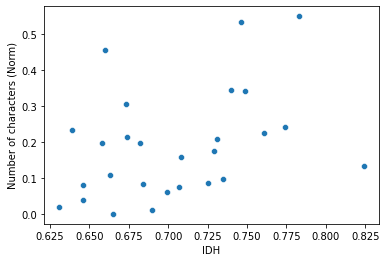

In [63]:
import seaborn as sns

scatter = sns.scatterplot(data=df_final.drop(27), x="IDH", y="Number of characters (Norm)")


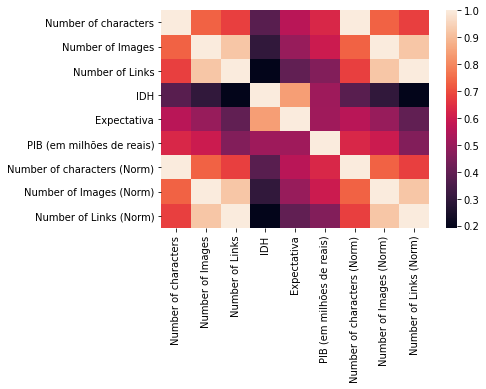

In [64]:
heatmap = sns.heatmap(df_final.drop(27).corr())

In [49]:
normalizado

,Number of characters,Number of Images,Number of Links
0,0.131968,0.000000,0.000000
1,0.207323,0.559236,0.338617
2,0.549661,0.857325,0.327801
3,0.534300,0.761783,0.284798
4,0.456673,0.532484,0.284127
5,0.341332,0.314650,0.156609
6,0.241605,0.584713,0.277600
7,0.097933,0.052229,0.031665
8,0.196348,0.268790,0.116851
9,0.232140,0.115924,0.094547


In [76]:
nordeste_df

,State name,Page ID,Wikipedia URL,Number of characters,Number of Images,Number of Links,Region
0,Paraíba,1517,https://pt.wikipedia.org/wiki/Para%C3%ADba,217327,256,3424,Nordeste
1,Rio Grande do Norte,1657,https://pt.wikipedia.org/wiki/Rio_Grande_do_Norte,118517,342,4411,Nordeste
2,Pernambuco,1518,https://pt.wikipedia.org/wiki/Pernambuco,312133,244,4229,Nordeste
3,Ceará,558,https://pt.wikipedia.org/wiki/Cear%C3%A1,222969,217,4366,Nordeste
4,Alagoas,299,https://pt.wikipedia.org/wiki/Alagoas,63099,209,1197,Nordeste
5,Sergipe,1718,https://pt.wikipedia.org/wiki/Sergipe,46539,92,1058,Nordeste
6,Bahia,453,https://pt.wikipedia.org/wiki/Bahia,442714,464,7895,Nordeste
7,Piauí,1519,https://pt.wikipedia.org/wiki/Piau%C3%AD,59430,55,737,Nordeste
8,Maranhão,1254,https://pt.wikipedia.org/wiki/Maranh%C3%A3o,301444,137,2636,Nordeste


In [77]:
sudeste_df

,State name,Page ID,Wikipedia URL,Number of characters,Number of Images,Number of Links,Region
0,Minas Gerais,1257,https://pt.wikipedia.org/wiki/Minas_Gerais,226786,421,8450,Sudeste
1,São Paulo (estado),1719,https://pt.wikipedia.org/wiki/S%C3%A3o_Paulo_(...,563035,589,7529,Sudeste
2,Rio de Janeiro (estado),1658,https://pt.wikipedia.org/wiki/Rio_de_Janeiro_(...,241860,99,1306,Sudeste
3,Espírito Santo,9944,https://pt.wikipedia.org/wiki/Esp%C3%ADrito_Santo,45912,21,388,Sudeste


In [78]:
sul_df

,State name,Page ID,Wikipedia URL,Number of characters,Number of Images,Number of Links,Region
0,Paraná,1483,https://pt.wikipedia.org/wiki/Paran%C3%A1,341620,296,4497,Sul
1,Rio Grande do Sul,2731,https://pt.wikipedia.org/wiki/Rio_Grande_do_Sul,507419,654,7401,Sul
2,Santa Catarina,1705,https://pt.wikipedia.org/wiki/Santa_Catarina,255471,209,5448,Sul


In [79]:
norte_df

,State name,Page ID,Wikipedia URL,Number of characters,Number of Images,Number of Links,Region
0,Amazonas,298,https://pt.wikipedia.org/wiki/Amazonas,238713,261,10215,Norte
1,Roraima,1656,https://pt.wikipedia.org/wiki/Roraima,120465,138,1867,Norte
2,Tocantins,1825,https://pt.wikipedia.org/wiki/Tocantins,48956,57,765,Norte
3,Pará,1516,https://pt.wikipedia.org/wiki/Par%C3%A1,80936,116,1475,Norte
4,Rondônia,1655,https://pt.wikipedia.org/wiki/Rond%C3%B4nia,65767,131,1964,Norte
5,Acre,9203,https://pt.wikipedia.org/wiki/Acre,93504,88,2309,Norte
6,Amapá,297,https://pt.wikipedia.org/wiki/Amap%C3%A1,138190,123,2250,Norte


In [81]:
centro_df

,State name,Page ID,Wikipedia URL,Number of characters,Number of Images,Number of Links,Region
0,Distrito Federal (Brasil),684,https://pt.wikipedia.org/wiki/Distrito_Federal...,161308,44,296,Centro-Oeste
1,Goiás,917,https://pt.wikipedia.org/wiki/Goi%C3%A1s,132013,85,1144,Centro-Oeste
2,Mato Grosso,1255,https://pt.wikipedia.org/wiki/Mato_Grosso,120542,72,1403,Centro-Oeste
3,Mato Grosso do Sul,1256,https://pt.wikipedia.org/wiki/Mato_Grosso_do_Sul,199281,463,7007,Centro-Oeste


In [82]:
estados_df = [norte_df, nordeste_df, centro_df, sudeste_df, sul_df]

In [87]:
brasil_df  = pd.concat(estados_df, ignore_index=True)

In [110]:
brasil_df

,State name,Page ID,Wikipedia URL,Number of characters,Number of Images,Number of Links,Region
0,Amazonas,298,https://pt.wikipedia.org/wiki/Amazonas,238713,261,10215,Norte
1,Roraima,1656,https://pt.wikipedia.org/wiki/Roraima,120465,138,1867,Norte
2,Tocantins,1825,https://pt.wikipedia.org/wiki/Tocantins,48956,57,765,Norte
3,Pará,1516,https://pt.wikipedia.org/wiki/Par%C3%A1,80936,116,1475,Norte
4,Rondônia,1655,https://pt.wikipedia.org/wiki/Rond%C3%B4nia,65767,131,1964,Norte
5,Acre,9203,https://pt.wikipedia.org/wiki/Acre,93504,88,2309,Norte
6,Amapá,297,https://pt.wikipedia.org/wiki/Amap%C3%A1,138190,123,2250,Norte
7,Paraíba,1517,https://pt.wikipedia.org/wiki/Para%C3%ADba,217327,256,3424,Nordeste
8,Rio Grande do Norte,1657,https://pt.wikipedia.org/wiki/Rio_Grande_do_Norte,118517,342,4411,Nordeste
9,Pernambuco,1518,https://pt.wikipedia.org/wiki/Pernambuco,312133,244,4229,Nordeste


In [111]:
brasil_df['State name'][16] = 'Distrito Federal'
brasil_df['State name'][21] = 'São Paulo'
brasil_df['State name'][22] = 'Rio de Janeiro'


In [1]:
import seaborn as sns
import geopandas as gpd

In [2]:
info_ufs = gpd.read_file('bcim_2016_21_11_2018.gpkg', layer='lim_unidade_federacao_a')

DriverError: bcim_2016_21_11_2018.gpkg: No such file or directory

In [126]:
info_ufs.head()

,State name,nomeabrev,geometriaaproximada,sigla,geocodigo,id_produtor,id_elementoprodutor,cd_insumo_orgao,nr_insumo_mes,nr_insumo_ano,tx_insumo_documento,geometry
0,Goiás,None,Sim,GO,52,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,Mato Grosso do Sul,None,Sim,MS,50,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,Paraná,None,Sim,PR,41,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,Minas Gerais,None,Sim,MG,31,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,Sergipe,None,Sim,SE,28,1000001,None,NaN,None,None,None,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."


In [112]:
info_ufs.rename({'nome':'State name'}, axis=1, inplace=True)

In [114]:
brasil_com_info = info_ufs.merge(brasil_df, on = 'State name', how = 'left')

In [117]:
brasil_com_info[['State name', 'Number of characters', 'geometry']].head()

,State name,Number of characters,geometry
0,Goiás,132013,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743..."
1,Mato Grosso do Sul,199281,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159..."
2,Paraná,341620,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903..."
3,Minas Gerais,226786,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750..."
4,Sergipe,46539,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ..."


<AxesSubplot:>

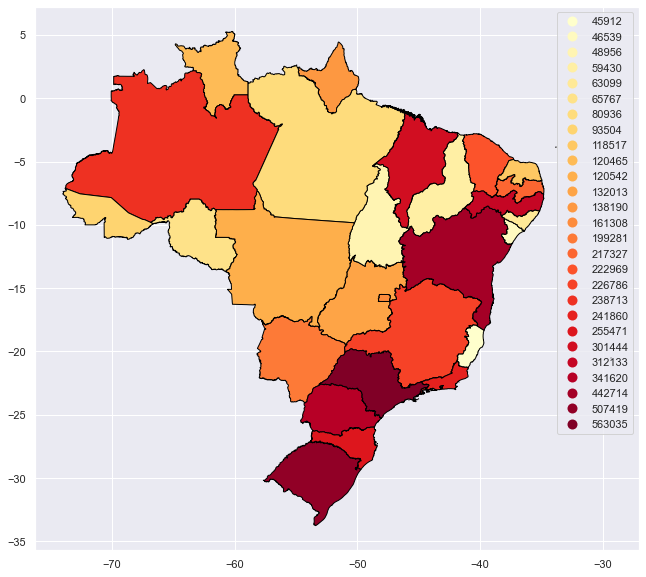

In [154]:
#plotar os gráfico
brasil_com_info.plot(column = 'Number of characters',
                    cmap = 'YlOrRd',
                    figsize = (15,10),
                    legend = True,
                    edgecolor = 'black')